In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Load dataset
data = pd.read_csv("./data/fer2013.csv.ziphistory = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=64
)
")

# Extract features and labels
pixels = data['pixels'].tolist()
faces = np.array([np.fromstring(p, sep=' ') for p in pixels])
faces = faces.reshape(faces.shape[0], 48, 48, 1).astype('float32') / 255.0

labels = to_categorical(data['emotion'], num_classes=7)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(faces, labels, test_size=0.2, random_state=42)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')   # 7 emotions
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/home/l/data/ml/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-21 07:22:10.513986: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 46, 46, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 21, 21, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,743 (1.36 MB)

 Trainable params: 356,295 (1.36 MB)

 Non-trainable params: 448 (1.75 KB)

In [7]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=64
)


Epoch 1/30


2025-08-21 07:22:49.507626: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 264582144 exceeds 10% of free system memory.


449/449 ━━━━━━━━━━━━━━━━━━━━ 95s 203ms/step - accuracy: 0.2817 - loss: 1.8101 - val_accuracy: 0.2719 - val_loss: 1.9361
Epoch 2/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 91s 204ms/step - accuracy: 0.3614 - loss: 1.6100 - val_accuracy: 0.4181 - val_loss: 1.4871
Epoch 3/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 90s 201ms/step - accuracy: 0.3979 - loss: 1.5332 - val_accuracy: 0.4471 - val_loss: 1.4295
Epoch 4/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 95s 211ms/step - accuracy: 0.4201 - loss: 1.4847 - val_accuracy: 0.4710 - val_loss: 1.3720
Epoch 5/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 92s 206ms/step - accuracy: 0.4414 - loss: 1.4353 - val_accuracy: 0.4639 - val_loss: 1.4217
Epoch 6/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 91s 202ms/step - accuracy: 0.4568 - loss: 1.3951 - val_accuracy: 0.5086 - val_loss: 1.2898
Epoch 7/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 91s 202ms/step - accuracy: 0.4666 - loss: 1.3690 - val_accuracy: 0.4893 - val_loss: 1.3629
Epoch 8/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 92s 205ms/step - accuracy: 0.4854 - loss: 1.3373 - val

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Accuracy
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

# Predictions
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)


225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.5568 - loss: 1.2388
Test Accuracy: 0.56
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step
              precision    recall  f1-score   support

           0       0.63      0.31      0.41       985
           1       0.81      0.17      0.28       102
           2       0.48      0.18      0.27      1043
           3       0.64      0.89      0.74      1765
           4       0.47      0.37      0.41      1210
           5       0.69      0.73      0.71       795
           6       0.44      0.70      0.54      1278

    accuracy                           0.56      7178
   macro avg       0.59      0.48      0.48      7178
weighted avg       0.56      0.56      0.53      7178

Confusion Matrix:
 [[ 302    0   60  172  135   29  287]
 [  19   17   20   17   16    2   11]
 [  64    2  191  184  185  167  250]
 [  16    0   13 1569   43   31   93]
 [  43    2   57  219  442   21  426]
 [  10    0   37   96   12  584   56]
 [  26    0   17  

In [9]:
model.save("emotion_model.h5")


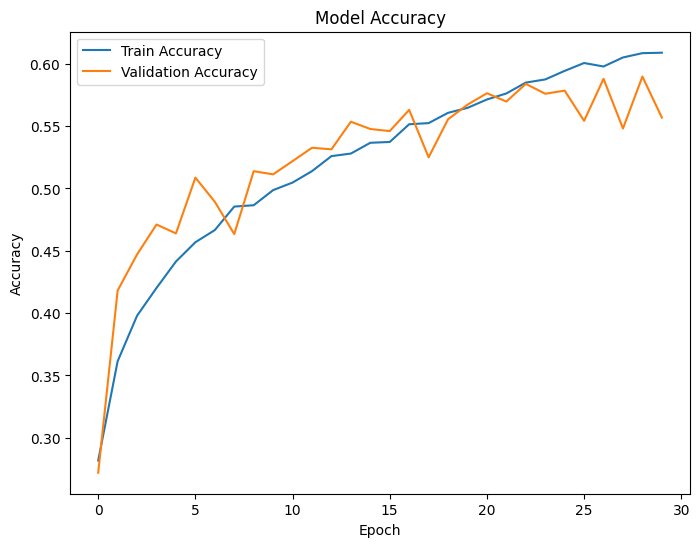

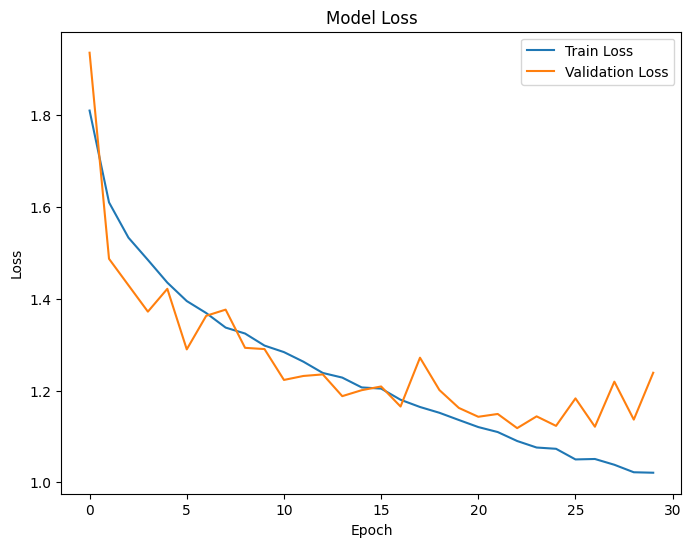

In [10]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [1]:
!pip install seaborn
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels,
            yticklabels=labels)
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()


NameError: name 'y_true' is not defined

In [ ]:
import pandas as pd

# Save actual vs predicted
results_df = pd.DataFrame({
    "Actual": [emotion_labels[i] for i in y_true],
    "Predicted": [emotion_labels[i] for i in y_pred]
})

results_df.to_csv("emotion_predictions.csv", index=False)
print("✅ Predictions saved to emotion_predictions.csv")
